In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

test_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

In [32]:
image_size = (128,128)
batch_size = 10

training_data_dir = r'C:\Users\snirm\Devl\ML\Final-Project\Sessions\Test Session 6\Train'
validation_data_dir = r'C:\Users\snirm\Devl\ML\Final-Project\Sessions\Test Session 6\Validation'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 35416 images belonging to 100 classes.
Found 3986 images belonging to 100 classes.


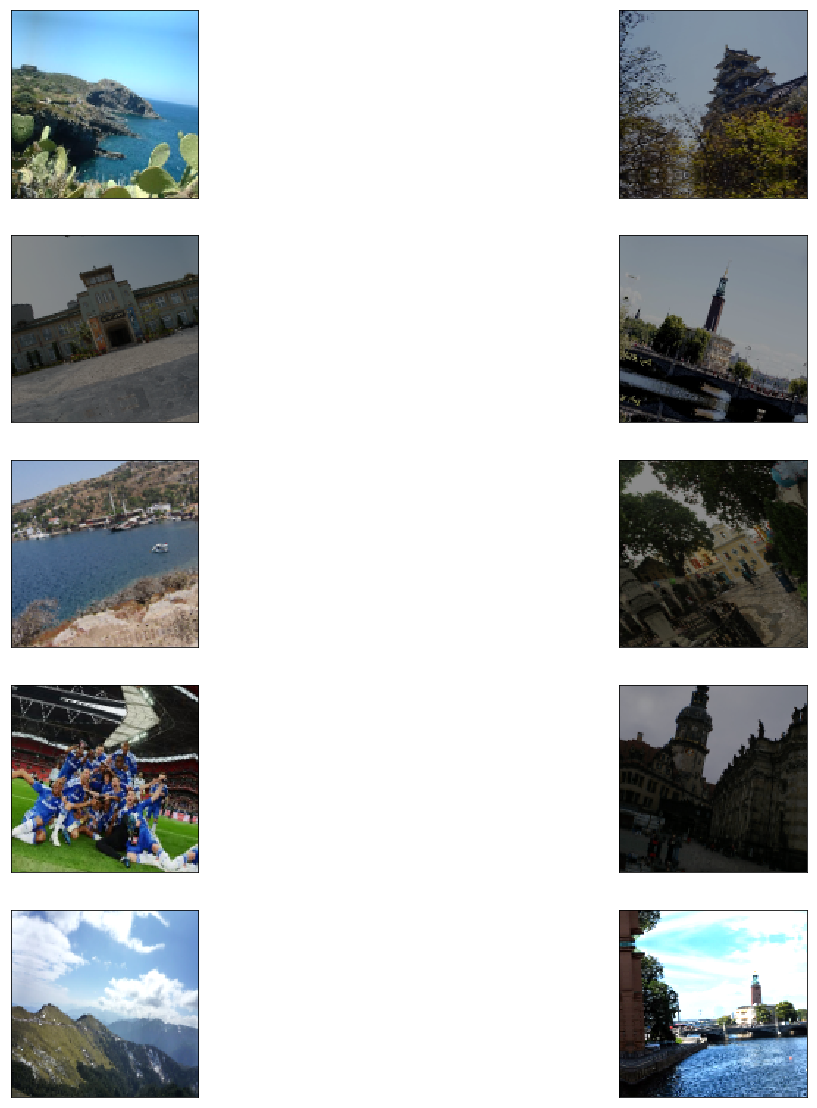

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(int)
    plt.imshow(image)

In [34]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

In [6]:
base_model = applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(image_size[0], image_size[1], 3))

In [7]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [20]:
classCount = 100

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(classCount,activation='softmax')(x) #final layer with softmax activation

model_final=Model(inputs=base_model.input,outputs=preds)
    

In [21]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0))

In [22]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

3541


In [23]:
class LossAccHisotry(Callback):
    def on_train_begin(self,logs={}):
        self.loss_history = []
        self.accuracy_history = []
        self.val_loss_history = []
        self.val_accuracy_history = []
        
    #def on_batch_end(self,batch, logs={}):
        #self.loss_history.append(logs.get('loss'))
        #self.accuracy_history.append(logs.get('acc'))
        
    def on_epoch_end(self, epoch, logs={}):
        self.val_loss_history.append(logs.get('val_loss'))
        self.val_accuracy_history.append(logs.get('val_acc'))
        self.loss_history.append(logs.get('loss'))
        self.accuracy_history.append(logs.get('acc'))
    
history = LossAccHisotry()

In [24]:
import time

networkfileName = "InceptionV3_{}.h5".format(int(time.time()))
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='min')

In [25]:
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [27]:
model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=5
                   ,callbacks = [history, checkpoint, early])

Epoch 1/5
3540/3541 [============================>.] - ETA: 0s - loss: 1.4551 - acc: 0.6504
Epoch 00001: val_acc improved from -inf to 0.78374, saving model to InceptionV3_1551874934.h5
3541/3541 [==============================] - 1161s 328ms/step - loss: 1.4549 - acc: 0.6504 - val_loss: 0.8628 - val_acc: 0.7837
Epoch 2/5
3540/3541 [============================>.] - ETA: 0s - loss: 0.8155 - acc: 0.7874
Epoch 00002: val_acc improved from 0.78374 to 0.85198, saving model to InceptionV3_1551874934.h5
3541/3541 [==============================] - 1073s 303ms/step - loss: 0.8155 - acc: 0.7874 - val_loss: 0.6168 - val_acc: 0.8520
Epoch 3/5
3540/3541 [============================>.] - ETA: 0s - loss: 0.6162 - acc: 0.8363
Epoch 00003: val_acc improved from 0.85198 to 0.88936, saving model to InceptionV3_1551874934.h5
3541/3541 [==============================] - 1211s 342ms/step - loss: 0.6162 - acc: 0.8363 - val_loss: 0.4459 - val_acc: 0.8894
Epoch 4/5
3540/3541 [============================>.]

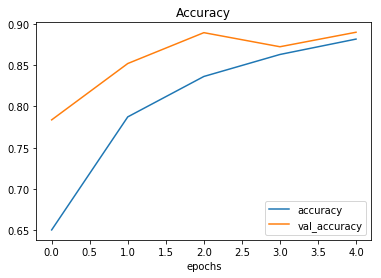

In [28]:
import matplotlib.pyplot as plt
x = range(0, len(history.accuracy_history))
plt.plot(x, history.accuracy_history)
plt.plot(x, history.val_accuracy_history)
plt.xlabel('epochs')
plt.title('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

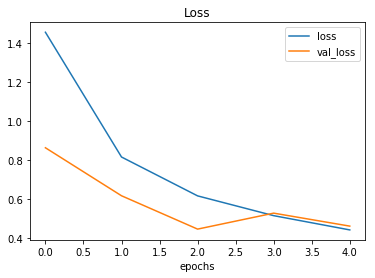

In [29]:
x = range(0, len(history.loss_history))
plt.plot(x, history.loss_history)
plt.plot(x, history.val_loss_history)
plt.xlabel('epochs')
plt.title('Loss')
plt.legend(['loss', 'val_loss'])